##**a. Praproses Data (Data Preprocessing)**

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive

from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import keras.layers as layers
from tensorflow.keras import layers, models
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from keras.layers import LSTM, Dense, Dropout
import math

import warnings
warnings.filterwarnings("ignore")

###**Import Dataset**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**IBM (International Business Machines Corporation) Dataset**

In [ ]:
dataIBM = pd.read_csv('/content/drive/MyDrive/IBM.csv')
dataIBM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.618153,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.623556,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.617343,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.605185,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.593837,544000


In [ ]:
dataIBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14663 entries, 0 to 14662
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14663 non-null  object 
 1   Open       14663 non-null  float64
 2   High       14663 non-null  float64
 3   Low        14663 non-null  float64
 4   Close      14663 non-null  float64
 5   Adj Close  14663 non-null  float64
 6   Volume     14663 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 802.0+ KB


In [ ]:
row, col = dataIBM.shape
print("Jumlah baris dalam data IBM: ", row)
print("Jumlah kolom dalam data IBM: ", col)

Jumlah baris dalam data IBM:  14663
Jumlah kolom dalam data IBM:  7


Data IBM terdiri dari 14663 baris dan 7 kolom.

###**Checking Missing Value and Duplicated Data**

In [ ]:
print('Missing Value on IBM dataset : ')
print(dataIBM.isna().sum())
dataIBM.shape

Missing Value on IBM dataset : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


(14663, 7)

Setelah melakukan pengecekan, output 0 dari tiap variable diatas menunjukkan tidak adanya missing value dari semua variable dalam dataset IBM.

In [ ]:
print('Duplicated Data on IBM dataset : ')
print(dataIBM.shape)
print(dataIBM[dataIBM.duplicated()].shape)

Duplicated Data on IBM dataset : 
(14663, 7)
(0, 7)



*   dataIBM mempunyai 14663 baris dan 7 kolom data.
*   Setelah dicheck dengan duplicated() method ternyata tidak ada data yang terduplikasi.



###**Convert Date Column**

In [ ]:
dataIBM["Date"] = pd.to_datetime(dataIBM["Date"])  # Convert "Date" column to datetime format
dataIBM.set_index("Date", inplace=True)  # Set "Date" column as index
dataIBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,0.618153,387200
1962-01-03,7.626667,7.693333,7.626667,7.693333,0.623556,288000
1962-01-04,7.693333,7.693333,7.613333,7.616667,0.617343,256000
1962-01-05,7.606667,7.606667,7.453333,7.466667,0.605185,363200
1962-01-08,7.460000,7.460000,7.266667,7.326667,0.593837,544000


*   Mengubah kolom `Date` dalam dataframe menjadi tipe data datetime untuk memudahkan proses pengolahan data selanjutnya.
*   Menjadikan kolom `Date` yang sudah diubah sebagai index dalam dataframe.



In [ ]:
 dataIBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14663 entries, 1962-01-02 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       14663 non-null  float64
 1   High       14663 non-null  float64
 2   Low        14663 non-null  float64
 3   Close      14663 non-null  float64
 4   Adj Close  14663 non-null  float64
 5   Volume     14663 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 801.9 KB


Setiap kolom pada dataset memiliki 14663 data dengan tipe data yang ada yaitu float dan integer.

###**Using `Date` and `Close` Column**

In [ ]:
IBM_price = pd.DataFrame(dataIBM['Close']).rename(columns={'Close':'Price'})
IBM_price.head()

,Price
Date,
1962-01-02,7.626667
1962-01-03,7.693333
1962-01-04,7.616667
1962-01-05,7.466667
1962-01-08,7.326667


*   Membuat dataframe baru "IBM_price" yang hanya menggunakan kolom `Date` dan `Close`
*   Mengubah nama kolom `Close` menjadi `Price` dan menampilkan isi data teratas dari dataframe terbaru



In [ ]:
IBM_price.tail(3)

,Price
Date,
2020-03-30,112.930000
2020-03-31,110.930000
2020-04-01,105.139999


###**Creating Train, Test, and Validation Set for IBM Dataset**


In [ ]:
stockIBM = IBM_price.copy()

In [ ]:
stockIBM

,Price
Date,
1962-01-02,7.626667
1962-01-03,7.693333
1962-01-04,7.616667
1962-01-05,7.466667
1962-01-08,7.326667
...,...
2020-03-26,112.889999
2020-03-27,108.029999
2020-03-30,112.930000


In [ ]:
# Calculate the indices for splitting
total_length = len(stockIBM)
train_index = int(0.8 * total_length)
val_index = int(0.9 * total_length)

# Split the dataset
training_set = stockIBM.iloc[:train_index][['Price']]
val_set = stockIBM.iloc[train_index:val_index][['Price']]
test_set = stockIBM.iloc[val_index:][['Price']]

In [ ]:
print('Train set: {} baris x {} kolom'.format(training_set.shape[0], training_set.shape[1]))
print('Test set: {} baris x {} kolom'.format(test_set.shape[0], test_set.shape[1]))
print('Validation set: {} baris x {} kolom'.format(val_set.shape[0], val_set.shape[1]))

Train set: 11730 baris x 1 kolom
Test set: 1467 baris x 1 kolom
Validation set: 1466 baris x 1 kolom


Output diatas menunjukkan jumlah data setelah dibagi menjadi 3 dengan proporsi 80% training set, 10% test set, dan 10% validation set.

In [ ]:
training_set.head(3)

,Price
Date,
1962-01-02,7.626667
1962-01-03,7.693333
1962-01-04,7.616667


In [ ]:
test_set.head(3)

,Price
Date,
2014-06-05,185.979996
2014-06-06,186.369995
2014-06-09,186.220001


In [ ]:
val_set.head(3)

,Price
Date,
2008-08-07,129.050003
2008-08-08,128.809998
2008-08-11,126.599998


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set = scaler.fit_transform(training_set)
val_set = scaler.fit_transform(val_set)
test_set = test_set.to_numpy()



*   Melakukan scaling dengan range angka 0 sampai 1 dan normalisasi data pada training set.
*   Melakukan scaling dengan range angka 0 sampai 1 dan normalisasi data pada validation set.
*   Melakukan transformasi data pada testing set menjadi numpy array.




In [ ]:
timesteps = 5
x_train = []
y_train = []
for i in range(timesteps, training_set.shape[0] - timesteps + 1):
    x_train.append(training_set[i-timesteps:i, 0])
    y_train.append(training_set[i:i+timesteps, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train[0], y_train[0])
print(x_train[1], y_train[1])

[0.02650821 0.02700649 0.02643348 0.02531236 0.02426598] [0.02491374 0.02501339 0.02561132 0.02571098 0.02596011]
[0.02700649 0.02643348 0.02531236 0.02426598 0.02491374] [0.02501339 0.02561132 0.02571098 0.02596011 0.02536218]


Training set dibuat dengan menggunakan timesteps sebesar 5. Dari output diatas, 5 data pertama digunakan sebagai input (window size) dan 5 data berikutnya merupakan output (horizon).



In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

*   Mengubah dimensi `x_train` agar sesuai dengan model yang akan digunakan. Dimensi `x_train` sebelumnya (jumlah sampel, timesteps) dan diubah menjadi (jumlah sampel, timesteps, 1).
*   Variable `idx` untuk membuat array berisi indeks secara acak. Ini digunakan untuk mengacak urutan sampel training set sehingga model dapat belajar lebih baik.



In [ ]:
timesteps = 5
x_val = []
y_val = []
for i in range(timesteps, val_set.shape[0] - timesteps + 1):
    x_val.append(val_set[i-timesteps:i, 0])
    y_val.append(val_set[i:i+timesteps, 0])

x_val, y_val = np.array(x_val), np.array(y_val)

print(x_val[0], y_val[0])
print(x_val[1], y_val[1])


[0.39782037 0.39615436 0.38081354 0.37123422 0.37526033] [0.3831737  0.37914758 0.36686101 0.35276966 0.35242262]
[0.39615436 0.38081354 0.37123422 0.37526033 0.3831737 ] [0.37914758 0.36686101 0.35276966 0.35242262 0.35575453]


Validation set dibuat dengan menggunakan timesteps sebesar 5. Dari output diatas, 5 data pertama merupakan input dan 5 data berikutnya merupakan output (horizon).



In [ ]:
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
idx1 = np.random.permutation(len(x_val))
x_val = x_val[idx1]
y_val = y_val[idx1]

*   Mengubah dimensi `x_val` agar sesuai dengan model yang akan digunakan. Dimensi `x_val` sebelumnya (jumlah sampel, timesteps) dan diubah menjadi (jumlah sampel, timesteps, 1).
*   Variable `idx1` untuk membuat array berisi indeks secara acak. Ini digunakan untuk mengacak urutan sampel validation set sehingga model dapat belajar lebih baik.

In [ ]:
timesteps = 5
x_test = []
y_test = []
for i in range(timesteps, test_set.shape[0] - timesteps + 1):
    x_test.append(test_set[i-timesteps:i, 0])
    y_test.append(test_set[i:i+timesteps, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test[0], y_test[0])
print(x_test[1], y_test[1])

[185.97999573 186.36999512 186.22000122 184.28999329 182.25      ] [181.22000122 182.55999756 182.3500061  182.25999451 183.6000061 ]
[186.36999512 186.22000122 184.28999329 182.25       181.22000122] [182.55999756 182.3500061  182.25999451 183.6000061  182.82000732]


Testing set dibuat dengan menggunakan timesteps sebesar 5. Dari output diatas, 5 data pertama merupakan input dan 5 data berikutnya merupakan output (horizon).



In [ ]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
idx2 = np.random.permutation(len(x_test))
x_test = x_test[idx2]
y_test = y_test[idx2]

*   Mengubah dimensi `x_test` agar sesuai dengan model yang akan digunakan. Dimensi `x_test` sebelumnya (jumlah sampel, timesteps) dan diubah menjadi (jumlah sampel, timesteps, 1).
*   Variable `idx2` untuk membuat array berisi indeks secara acak. Ini digunakan untuk mengacak urutan sampel testing set sehingga model dapat belajar lebih baik.

###**FB (Facebook, Inc) Dataset**

In [ ]:
dataFB = pd.read_csv('/content/drive/MyDrive/FB.csv')
dataFB.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [ ]:
dataFB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1980 non-null   object 
 1   Open       1980 non-null   float64
 2   High       1980 non-null   float64
 3   Low        1980 non-null   float64
 4   Close      1980 non-null   float64
 5   Adj Close  1980 non-null   float64
 6   Volume     1980 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 108.4+ KB


In [ ]:
row, col = dataFB.shape
print("Jumlah baris dalam data FB: ", row)
print("Jumlah kolom dalam data FB: ", col)

Jumlah baris dalam data FB:  1980
Jumlah kolom dalam data FB:  7


Data Facebook terdiri dari 1980 baris dan 7 kolom.

###**Checking Missing Value and Duplicated Data**

In [ ]:
print('Missing Value on FB dataset : ')
print(dataFB.isna().sum())
dataFB.shape

Missing Value on FB dataset : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


(1980, 7)

Setelah melakukan pengecekan, output 0 dari tiap variable diatas menunjukkan tidak adanya missing value dari semua variable dalam dataset Facebook.

In [ ]:
print('Duplicated Data on FB dataset : ')
print(dataFB.shape)
print(dataFB[dataFB.duplicated()].shape)

Duplicated Data on FB dataset : 
(1980, 7)
(0, 7)


*   dataFB mempunyai 1980 baris dan 7 kolom.
*   Setelah dicheck dengan duplicated() method ternyata tidak ada data yang terduplikasi.



In [ ]:
# Parse dates and set "Date" column as index
dataFB["Date"] = pd.to_datetime(dataFB["Date"])  # Convert "Date" column to datetime format
dataFB.set_index("Date", inplace=True)  # Set "Date" column as index
dataFB.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


*   Mengubah kolom `Date` dalam dataframe menjadi tipe data datetime untuk memudahkan proses pengolahan data selanjutnya.
*   Menjadikan kolom `Date` yang sudah diubah sebagai index dalam dataframe.



###**Convert Date Column**

In [ ]:
dataFB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2012-05-18 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1980 non-null   float64
 1   High       1980 non-null   float64
 2   Low        1980 non-null   float64
 3   Close      1980 non-null   float64
 4   Adj Close  1980 non-null   float64
 5   Volume     1980 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.3 KB


Setiap kolom pada dataset memiliki 1980 data dengan tipe data yang ada yaitu float dan integer.

In [ ]:
FB_price = pd.DataFrame(dataFB['Close']).rename(columns={'Close':'Price'})
FB_price.head()

,Price
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


*   Membuat dataframe baru "FB_price" yang hanya menggunakan kolom `Date` dan `Close`
*   Mengubah nama kolom `Close` menjadi `Price` dan menampilkan isi data teratas dari dataframe terbaru



###**Creating Train, Test, and Validation Set for FB Dataset**


In [ ]:
stockFB = FB_price.copy()

In [ ]:
stockFB

,Price
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2020-03-26,163.339996
2020-03-27,156.789993
2020-03-30,165.949997


In [ ]:
# Calculate the data
total_length1 = len(stockFB)
train_index1 = int(0.8 * total_length1)
val_index1 = int(0.9 * total_length1)

# Split the dataset
training_set1 = stockFB.iloc[:train_index1][['Price']]
val_set1 = stockFB.iloc[train_index1:val_index1][['Price']]
test_set1 = stockFB.iloc[val_index1:][['Price']]

In [ ]:
print('Train set: {} baris x {} kolom'.format(training_set1.shape[0], training_set1.shape[1]))
print('Test set: {} baris x {} kolom'.format(test_set1.shape[0], test_set1.shape[1]))
print('Validation set: {} baris x {} kolom'.format(val_set1.shape[0], val_set1.shape[1]))

Train set: 1584 baris x 1 kolom
Test set: 198 baris x 1 kolom
Validation set: 198 baris x 1 kolom


Output diatas menunjukkan jumlah data setelah dibagi menjadi 3 dengan proporsi 80% training set, 10% test set, dan 10% validation set.

In [ ]:
training_set1.head(3)

,Price
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000


In [ ]:
val_set1.head(3)

,Price
Date,
2018-09-05,167.179993
2018-09-06,162.529999
2018-09-07,163.039993


In [ ]:
test_set1.head(3)

,Price
Date,
2019-06-20,189.529999
2019-06-21,191.139999
2019-06-24,192.600006


In [ ]:
scaler1 = MinMaxScaler(feature_range=(0,1))
training_set1 = scaler1.fit_transform(training_set)
val_set1 = scaler1.fit_transform(val_set)
test_set1 = test_set1.to_numpy()



*   Melakukan scaling dengan range angka 0 sampai 1 dan normalisasi data pada training set.
*   Melakukan scaling dengan range angka 0 sampai 1 dan normalisasi data pada validation set.
*   Melakukan transformasi data pada testing set menjadi numpy array.




In [ ]:
timesteps = 5
x_train1 = []
y_train1 = []
for i in range(timesteps, training_set1.shape[0] - timesteps + 1):
    x_train1.append(training_set1[i-timesteps:i, 0])
    y_train1.append(training_set1[i:i+timesteps, 0])

x_train1, y_train1 = np.array(x_train1), np.array(y_train1)

print(x_train1[0], y_train1[0])
print(x_train1[1], y_train1[1])

[0.02650821 0.02700649 0.02643348 0.02531236 0.02426598] [0.02491374 0.02501339 0.02561132 0.02571098 0.02596011]
[0.02700649 0.02643348 0.02531236 0.02426598 0.02491374] [0.02501339 0.02561132 0.02571098 0.02596011 0.02536218]


Training set dibuat dengan menggunakan timesteps sebesar 5. Dari output diatas, 5 data pertama digunakan sebagai input (window size) dan 5 data berikutnya merupakan output (horizon).



In [ ]:
x_train1 = x_train1.reshape((x_train1.shape[0], x_train1.shape[1], 1))
idx_train = np.random.permutation(len(x_train1))
x_train1 = x_train1[idx_train]
y_train1 = y_train1[idx_train]

*   Mengubah dimensi `x_train1` agar sesuai dengan model yang akan digunakan. Dimensi `x_train1` sebelumnya (jumlah sampel, timesteps) dan diubah menjadi (jumlah sampel, timesteps, 1).
*   Variable `idx_train` untuk membuat array berisi indeks secara acak. Ini digunakan untuk mengacak urutan sampel training set sehingga model dapat belajar lebih baik.



In [ ]:
timesteps = 5
x_val1 = []
y_val1 = []
for i in range(timesteps, val_set1.shape[0] - timesteps + 1):
    x_val1.append(val_set1[i-timesteps:i, 0])
    y_val1.append(val_set1[i:i+timesteps, 0])

x_val1, y_val1 = np.array(x_val1), np.array(y_val1)

print(x_val1[0], y_val1[0])
print(x_val1[1], y_val1[1])

[0.39782037 0.39615436 0.38081354 0.37123422 0.37526033] [0.3831737  0.37914758 0.36686101 0.35276966 0.35242262]
[0.39615436 0.38081354 0.37123422 0.37526033 0.3831737 ] [0.37914758 0.36686101 0.35276966 0.35242262 0.35575453]


Validation set dibuat dengan menggunakan timesteps sebesar 5. Dari output diatas, 5 data pertama digunakan sebagai input (window size) dan 5 data berikutnya merupakan output (horizon).



In [ ]:
x_val1 = x_val1.reshape((x_val1.shape[0], x_val1.shape[1], 1))
idx1_val = np.random.permutation(len(x_val1))
x_val1 = x_val1[idx1_val]
y_val1 = y_val1[idx1_val]

*   Mengubah dimensi `x_val1` agar sesuai dengan model yang akan digunakan. Dimensi `x_val1` sebelumnya (jumlah sampel, timesteps) dan diubah menjadi (jumlah sampel, timesteps, 1).
*   Variable `idx1_val` untuk membuat array berisi indeks secara acak. Ini digunakan untuk mengacak urutan sampel testing set sehingga model dapat belajar lebih baik.

In [ ]:
timesteps = 5
x_test1 = []
y_test1 = []
for i in range(timesteps, test_set1.shape[0] - timesteps + 1):
    x_test1.append(test_set1[i-timesteps:i, 0])
    y_test1.append(test_set1[i:i+timesteps, 0])

x_test1, y_test1 = np.array(x_test1), np.array(y_test1)

print(x_test1[0], y_test1[0])
print(x_test1[1], y_test1[1])

[189.52999878 191.13999939 192.6000061  188.83999634 187.66000366] [189.5        193.         193.         195.         197.19999695]
[191.13999939 192.6000061  188.83999634 187.66000366 189.5       ] [193.         193.         195.         197.19999695 196.3999939 ]


Testing set dibuat dengan menggunakan timesteps sebesar 5. Dari output diatas, 5 data pertama digunakan sebagai input (window size) dan 5 data berikutnya merupakan output (horizon).



In [ ]:
x_test1 = x_test1.reshape((x_test1.shape[0], x_test1.shape[1], 1))
idx2 = np.random.permutation(len(x_test1))
x_test1 = x_test1[idx2]
y_test1 = y_test1[idx2]

*   Mengubah dimensi `x_test1` agar sesuai dengan model yang akan digunakan. Dimensi `x_test1` sebelumnya (jumlah sampel, timesteps) dan diubah menjadi (jumlah sampel, timesteps, 1).
*   Variable `idx2` untuk membuat array berisi indeks secara acak. Ini digunakan untuk mengacak urutan sampel testing set sehingga model dapat belajar lebih baik.

##**b. Arsitektur Baseline Transformer**

###**Architecture Baseline for IBM Dataset**

In [ ]:
def transformerModel(inputs, head, n_head, feedfoward, dropout=0):
    # Embedding Layer
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    # Attention Layer
    x = layers.MultiHeadAttention(key_dim=head, num_heads=n_head, dropout=dropout)(x, x)
    result = x + inputs

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    # Feed Foward
    x = layers.Conv1D(filters=feedfoward, kernel_size=1, activation = "relu")(x)

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    return x + result

*   Baseline model pertama menggunakan Transformer sesuai dengan gambar pada soal. Layer pertama terdiri dari Embedding Layer yang berisi normalisasi lapisan `inputs` menggunakan `LayerNormalization`.
*   Layer kedua yaitu Attention Layer, dalam layer ini `MultiHeadAttention` merupakan komponen dari transformer yang menerima input `x`.
*   Layer ketiga yaitu Add & Norm, pada layer ini Attention Layer (x) ditambahkan dengan input awal (inputs). Selanjutnya, dilakukan normalisasi data menggunakan `LayerNormalization`.
*   Layer keempat yaitu Feed Foward, dilakukan operasi feed foward pada nilai `x` menggunakan layer 1 layer `Conv1D` dan fungsi aktivasi ReLU.
*   Layer terakhir yaitu Add & Norm, layer ini menambahkan hasil feed foward dan hasil Add & Norm yang sebelumnya. Kemudian dilakukan normalisasi data kembali.
*   Output dari fungsi `transformerModel` diatas adalah nilai `x + result` sebagai block transformers.





In [ ]:
def modelling(input_shape, head, n_head, feedfoward, transformer_blocks,):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(transformer_blocks):
        x = transformerModel(x, head, n_head, feedfoward)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    layeroutput = layers.Dense(5, activation="linear")(x)

    return keras.Model(inputs, layeroutput)

*   Fungsi `modelling` untuk implementasi model yang terdiri dari beberapa block Transformer. Fungsi ini dimulai dengan membuat layer input menggunakan `keras.Input(shape=input_shape)` yang akan digunakan untuk titik masuk data input.
*   Selanjutnya, dilakukan iterasi ke seluruh block transformer. Output dari block transformer akan menjadi input untuk block selanjutnya.
*   Setelah seluruh block transformer diproses, selanjutnya mengambil rata-rata global dari setiap saluran pada dimensi waktu menggunakan `GlobalAveragePooling1D`.
*   Layer terakhir yaitu dense layer dengan 5 unit digunakan sebagai output layer yang menggunakan fungsi aktivasi linear. Layer ini akan menghasilkan output dari model.





In [ ]:
input_shape = x_train.shape[1:]

model = modelling(input_shape, head = 8, n_head = 10, feedfoward = 5, transformer_blocks = 5,)
model.compile(loss="mae", optimizer='adam', metrics=["mae"],)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 5, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 5, 1)        561         ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

*   Dari output diatas, dapat dilihat bahwa model
terdiri dari beberapa layer yaitu `layer_normalization`, `multi_head_attention`, `tf.__operators__.add`, `global_average_pooling1d`, dan `dense`.
*   Layer yang ada pada arsitektur ini saling terhubung dengan hubungan yang sesuai pada kolom `Connected to`.
*   Total parameter yang digunakan model ini adalah 2.855.

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
)

Epoch 1/10
367/367 [==============================] - 32s 16ms/step - loss: 0.0221 - mae: 0.0221 - val_loss: 0.0233 - val_mae: 0.0233
Epoch 2/10
367/367 [==============================] - 7s 19ms/step - loss: 0.0078 - mae: 0.0078 - val_loss: 0.0228 - val_mae: 0.0228
Epoch 3/10
367/367 [==============================] - 6s 15ms/step - loss: 0.0078 - mae: 0.0078 - val_loss: 0.0231 - val_mae: 0.0231
Epoch 4/10
367/367 [==============================] - 6s 17ms/step - loss: 0.0077 - mae: 0.0077 - val_loss: 0.0226 - val_mae: 0.0226
Epoch 5/10
367/367 [==============================] - 5s 15ms/step - loss: 0.0077 - mae: 0.0077 - val_loss: 0.0226 - val_mae: 0.0226
Epoch 6/10
367/367 [==============================] - 6s 15ms/step - loss: 0.0076 - mae: 0.0076 - val_loss: 0.0225 - val_mae: 0.0225
Epoch 7/10
367/367 [==============================] - 6s 16ms/step - loss: 0.0075 - mae: 0.0075 - val_loss: 0.0224 - val_mae: 0.0224
Epoch 8/10
367/367 [==============================] - 5s 14ms/step -

*   Dalam proses training, input data berupa
`x_train` dan `y_train`. Selain itu,
validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model diuji (train) dengan 10 epoch (iterasi) dan batch size sebesar 32.
*   Training loss dan validation loss berkurang secara bertahap dan konsisten.
*   Nilai training loss berkisar antara 0.007 - 0.02. Sedangkan, untuk validation loss berkisar di angka 0.02.

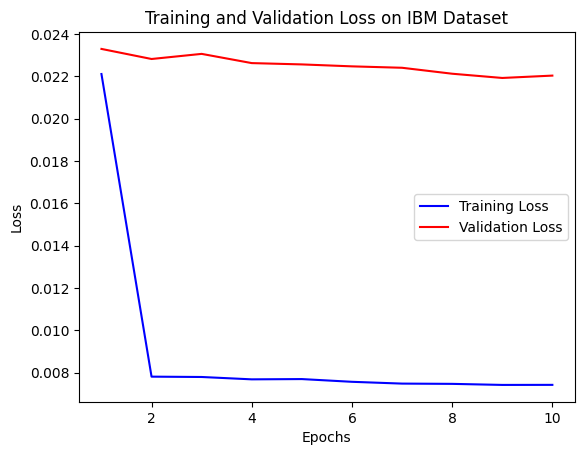

In [ ]:
 # Get training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss on IBM Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*   Grafik training loss sangat tinggi di awal, tetapi mengalami penurunan yang dratis saat model diuji. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan
stabil.
*   Grafik validation loss mengalami penurunan walaupun tidak telalu signifikan, tetapi penurunannya stabil. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan
stabil.
*   Hasil akhir dari pengujian model menunjukkan grafik training dan validation loss yang rendah
dan stabil. Grafik menunjukkan penurunan dari keduanya walaupun ada selisih nilai antara training dan testing loss.

###**Architecture Baseline for FB Dataset**

In [ ]:
def transformer_Model2(inputs, head, n_head, feedfoward, dropout=0):
    # Embedding Layer
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    # Attention Layer
    x = layers.MultiHeadAttention(key_dim=head, num_heads=n_head, dropout=dropout)(x, x)
    result = x + inputs

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    # Feed Foward
    x = layers.Conv1D(filters=feedfoward, kernel_size=1, activation = "relu")(x)

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    return x + result

*   Baseline model pertama menggunakan Transformer sesuai dengan gambar pada soal. Layer pertama terdiri dari Embedding Layer yang berisi normalisasi lapisan `inputs` menggunakan `LayerNormalization`.
*   Layer kedua yaitu Attention Layer, dalam layer ini `MultiHeadAttention` merupakan komponen dari transformer yang menerima input `x`.
*   Layer ketiga yaitu Add & Norm, pada layer ini Attention Layer (x) ditambahkan dengan input awal (inputs). Selanjutnya, dilakukan normalisasi data menggunakan `LayerNormalization`.
*   Layer keempat yaitu Feed Foward, dilakukan operasi feed foward pada nilai `x` menggunakan layer 1 layer `Conv1D` dan fungsi aktivasi ReLU.
*   Layer terakhir yaitu Add & Norm, layer ini menambahkan hasil feed foward dan hasil Add & Norm yang sebelumnya. Kemudian dilakukan normalisasi data kembali.
*   Output dari fungsi `transformerModel` diatas adalah nilai `x + result` sebagai block transformers.





In [ ]:
def modelling2(input_shape, head, n_head, feedfoward, transformer_blocks,):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(transformer_blocks):
        x = transformerModel(x, head, n_head, feedfoward)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

    layeroutput = layers.Dense(5, activation="linear")(x)
    return keras.Model(inputs, layeroutput)

*   Fungsi `modelling` untuk implementasi model yang terdiri dari beberapa block Transformer. Fungsi ini dimulai dengan membuat layer input menggunakan `keras.Input(shape=input_shape)` yang akan digunakan untuk titik masuk data input.
*   Selanjutnya, dilakukan iterasi ke seluruh block transformer. Output dari block transformer akan menjadi input untuk block selanjutnya.
*   Setelah seluruh block transformer diproses, selanjutnya mengambil rata-rata global dari setiap saluran pada dimensi waktu menggunakan `GlobalAveragePooling1D`.
*   Layer terakhir yaitu dense layer dengan 5 unit digunakan sebagai output layer yang menggunakan fungsi aktivasi linear. Layer ini akan menghasilkan output dari model.





In [ ]:
input_shape2 = x_train1.shape[1:]
model2 = modelling2(input_shape2, head = 8, n_head = 10, feedfoward = 5, transformer_blocks = 5,)
model2.compile(loss="mae", optimizer='adam', metrics=["mae"],)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 layer_normalization_15 (LayerN  (None, 5, 1)        2           ['input_2[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_5 (MultiH  (None, 5, 1)        561         ['layer_normalization_15[0][0]', 
 eadAttention)                                                    'layer_normalization_15[0][0]'] 
                                                                                            

*   Dari output diatas, dapat dilihat bahwa model
terdiri dari beberapa layer yaitu `layer_normalization`, `multi_head_attention`, `tf.__operators__.add`, `global_average_pooling1d`, dan `dense`.
*   Layer yang ada pada arsitektur ini saling terhubung dengan hubungan yang sesuai pada kolom `Connected to`.
*   Total parameter yang digunakan model ini adalah 2.855.

In [ ]:
historyFB = model2.fit(
    x_train1,
    y_train1,
    validation_data=(x_val1, y_val1),
    epochs=10,
    batch_size=32,
)

Epoch 1/10
367/367 [==============================] - 36s 24ms/step - loss: 0.1256 - mae: 0.1256 - val_loss: 0.0907 - val_mae: 0.0907
Epoch 2/10
367/367 [==============================] - 6s 16ms/step - loss: 0.0134 - mae: 0.0134 - val_loss: 0.0237 - val_mae: 0.0237
Epoch 3/10
367/367 [==============================] - 5s 15ms/step - loss: 0.0084 - mae: 0.0084 - val_loss: 0.0238 - val_mae: 0.0238
Epoch 4/10
367/367 [==============================] - 6s 17ms/step - loss: 0.0082 - mae: 0.0082 - val_loss: 0.0228 - val_mae: 0.0228
Epoch 5/10
367/367 [==============================] - 5s 14ms/step - loss: 0.0080 - mae: 0.0080 - val_loss: 0.0228 - val_mae: 0.0228
Epoch 6/10
367/367 [==============================] - 6s 17ms/step - loss: 0.0078 - mae: 0.0078 - val_loss: 0.0224 - val_mae: 0.0224
Epoch 7/10
367/367 [==============================] - 5s 15ms/step - loss: 0.0078 - mae: 0.0078 - val_loss: 0.0229 - val_mae: 0.0229
Epoch 8/10
367/367 [==============================] - 6s 16ms/step -

*   Dalam proses training, input data berupa
`x_train` dan `y_train`. Selain itu,
validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model diuji (train) dengan 10 epoch (iterasi) dan batch size sebesar 32.
*   Training loss dan validation loss berkurang secara bertahap dan konsisten.
*   Nilai training loss berkisar antara 0.007 - 0.05. Sedangkan, untuk validation loss berkisar di angka 0.02.

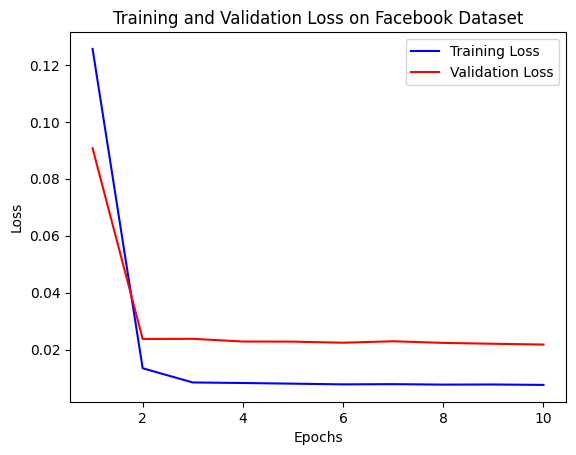

In [ ]:
 # Get training and validation loss from history
train_loss1 = historyFB.history['loss']
val_loss1 = historyFB.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, 'b', label='Training Loss')
plt.plot(epochs, val_loss1, 'r', label='Validation Loss')
plt.title('Training and Validation Loss on Facebook Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*   Grafik training dan validation loss sangat tinggi di awal, tetapi mengalami penurunan yang dratis dan stabil saat model diuji. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan
stabil.
*   Hasil akhir dari pengujian model menunjukkan grafik training dan validation loss yang rendah
dan stabil. Adanya penurunan yang sangat signifikan dari keduanya walaupun nilai loss nya tidak terlalu dekat antara training dan testing loss.

##**c. Modifikasi Arsitektur**

###**Modification for IBM Dataset**

In [ ]:
def transformerModified(inputs, head, n_head, feedfoward, dropout=0):
    # Embedding Layer
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    # Attention Layer
    x = layers.MultiHeadAttention(key_dim=head, num_heads=n_head, dropout=dropout)(x, x)
    result = x + inputs
    x = layers.Dropout(dropout)(x)

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    # Feed Foward
    x = layers.Conv1D(filters=feedfoward, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    return x + result



*   Modifikasi yang saya lakukan adalah menambahkan layer dropout pada lapisan feed foward dan attention layer. Saya menambahkan layer dropout untuk mencegah model yang overfitting.
*   Model modifikasi untuk IBM dataset menggunakan Transformer sesuai dengan gambar pada soal. Layer pertama terdiri dari Embedding Layer yang berisi normalisasi lapisan `inputs` menggunakan `LayerNormalization`.
*   Layer kedua yaitu Attention Layer, dalam layer ini `MultiHeadAttention` merupakan komponen dari transformer yang menerima input `x`.
*   Layer ketiga yaitu Add & Norm, pada layer ini Attention Layer (x) ditambahkan dengan input awal (inputs). Selanjutnya, dilakukan normalisasi data menggunakan `LayerNormalization`.
*   Layer keempat yaitu Feed Foward, dilakukan operasi feed foward pada nilai `x` menggunakan layer 1 layer `Conv1D` dan fungsi aktivasi ReLU.
*   Layer terakhir yaitu Add & Norm, layer ini menambahkan hasil feed foward dan hasil Add & Norm yang sebelumnya. Kemudian dilakukan normalisasi data kembali.
*   Output dari fungsi `transformerModel` diatas adalah nilai `x + result` sebagai block transformers.





In [ ]:
def modifymodel(input_shape,head,n_head,feedfoward,transformer_blocks,):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(transformer_blocks):  # This is what stacks our transformer blocks
        x = transformerModified(x, head, n_head, feedfoward)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

    outputs = layers.Dense(5, activation="linear")(x) #this is a pass-through
    return keras.Model(inputs, outputs)



*   Selanjutnya, saya melakukan modifikasi menggunakan hyperparameter.  Saya mengurangi jumlah head per block, demensi head, dan jumlah block transformer. Selain itu, saya juga menaikkan jumlah epoch dan batch size.
*   Fungsi `modifymodel` untuk implementasi model yang terdiri dari beberapa block Transformer. Fungsi ini dimulai dengan membuat layer input menggunakan `keras.Input(shape=input_shape)` yang akan digunakan untuk titik masuk data input.
*   Selanjutnya, dilakukan iterasi ke seluruh block transformer. Output dari block transformer akan menjadi input untuk block selanjutnya.
*   Setelah seluruh block transformer diproses, selanjutnya mengambil rata-rata global dari setiap saluran pada dimensi waktu menggunakan `GlobalAveragePooling1D`.
*   Layer terakhir yaitu dense layer dengan 5 unit digunakan sebagai output layer yang menggunakan fungsi aktivasi linear. Layer ini akan menghasilkan output dari model.





In [ ]:
input_shape1 = x_train.shape[1:]
modified = modifymodel(input_shape1, head = 5, n_head = 5, feedfoward = 5, transformer_blocks = 3,)
modified.compile(loss="mae", optimizer='adam', metrics=["mae"],)
modified.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 layer_normalization_30 (LayerN  (None, 5, 1)        2           ['input_3[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_10 (Multi  (None, 5, 1)        176         ['layer_normalization_30[0][0]', 
 HeadAttention)                                                   'layer_normalization_30[0][0]'] 
                                                                                            

*   Dari output diatas, dapat dilihat bahwa model
terdiri dari beberapa layer yaitu `layer_normalization`, `multi_head_attention`, `tf.__operators__.add`, `global_average_pooling1d`, dan `dense`.
*   Layer yang ada pada arsitektur ini saling terhubung dengan hubungan yang sesuai pada kolom `Connected to`.
*   Total parameter yang digunakan dalam model modifikasi ini adalah 570.

In [ ]:
history1 = modified.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    batch_size=64,
)

Epoch 1/15
184/184 [==============================] - 11s 13ms/step - loss: 0.1416 - mae: 0.1416 - val_loss: 0.2129 - val_mae: 0.2129
Epoch 2/15
184/184 [==============================] - 2s 11ms/step - loss: 0.0424 - mae: 0.0424 - val_loss: 0.0457 - val_mae: 0.0457
Epoch 3/15
184/184 [==============================] - 3s 15ms/step - loss: 0.0091 - mae: 0.0091 - val_loss: 0.0233 - val_mae: 0.0233
Epoch 4/15
184/184 [==============================] - 2s 10ms/step - loss: 0.0080 - mae: 0.0080 - val_loss: 0.0235 - val_mae: 0.0235
Epoch 5/15
184/184 [==============================] - 2s 10ms/step - loss: 0.0079 - mae: 0.0079 - val_loss: 0.0230 - val_mae: 0.0230
Epoch 6/15
184/184 [==============================] - 4s 21ms/step - loss: 0.0078 - mae: 0.0078 - val_loss: 0.0230 - val_mae: 0.0230
Epoch 7/15
184/184 [==============================] - 4s 19ms/step - loss: 0.0077 - mae: 0.0077 - val_loss: 0.0229 - val_mae: 0.0229
Epoch 8/15
184/184 [==============================] - 2s 10ms/step -

*   Dalam proses training, input data berupa
`x_train` dan `y_train`. Selain itu,
validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model diuji (train) dengan 15 epoch (iterasi) dan batch size sebesar 64.
*   Training loss dan validation loss berkurang secara bertahap dan konsisten.
*   Nilai training loss berkisar antara 0.007 - 0.1. Sedangkan, untuk validation loss berkisar antara 0.02 - 0.04.

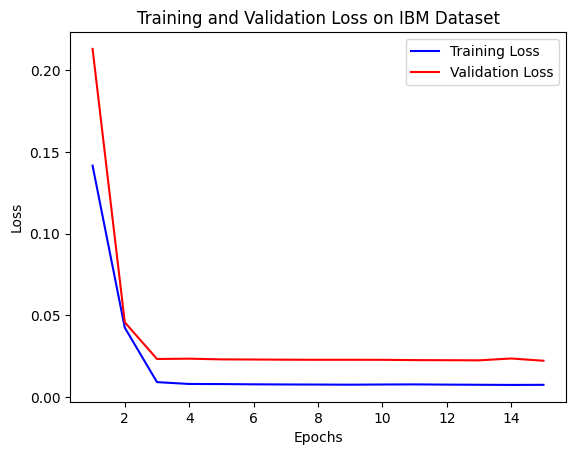

In [ ]:
 # Get training and validation loss from history
train_lossmodif = history1.history['loss']
val_lossmodif = history1.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_lossmodif) + 1)
plt.plot(epochs, train_lossmodif, 'b', label='Training Loss')
plt.plot(epochs, val_lossmodif, 'r', label='Validation Loss')
plt.title('Training and Validation Loss on IBM Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*   Grafik training dan validation loss sangat tinggi di awal, tetapi mengalami penurunan yang dratis dan stabil saat model diuji. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan
stabil.
*   Hasil akhir dari pengujian model menunjukkan grafik training dan validation loss yang rendah
dan stabil. Adanya penurunan yang sangat signifikan dari keduanya walaupun nilai loss nya tidak terlalu dekat antara training dan testing loss.

###**Modification for FB Dataset**

In [ ]:
def transformerModify2(inputs, head, n_head, feedfoward, dropout=0):
    # Embedding Layer
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    # Attention Layer
    x = layers.MultiHeadAttention(key_dim=head, num_heads=n_head, dropout=dropout)(x, x)
    result = x + inputs
    x = layers.Dropout(dropout)(x)

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    # Feed Foward
    x = layers.Conv1D(filters=feedfoward, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)

    # Add & Norm
    x = layers.LayerNormalization(epsilon=1e-6)(result)

    return x + result



*   Modifikasi yang saya lakukan adalah menambahkan layer dropout pada lapisan feed foward dan attention layer. Saya menambahkan layer dropout untuk mencegah model yang overfitting.
*   Model modifikasi untuk Facebook dataset menggunakan Transformer sesuai dengan gambar pada soal. Layer pertama terdiri dari Embedding Layer yang berisi normalisasi lapisan `inputs` menggunakan `LayerNormalization`.
*   Layer kedua yaitu Attention Layer, dalam layer ini `MultiHeadAttention` merupakan komponen dari transformer yang menerima input `x`.
*   Layer ketiga yaitu Add & Norm, pada layer ini Attention Layer (x) ditambahkan dengan input awal (inputs). Selanjutnya, dilakukan normalisasi data menggunakan `LayerNormalization`.
*   Layer keempat yaitu Feed Foward, dilakukan operasi feed foward pada nilai `x` menggunakan layer 1 layer `Conv1D` dan fungsi aktivasi ReLU.
*   Layer terakhir yaitu Add & Norm, layer ini menambahkan hasil feed foward dan hasil Add & Norm yang sebelumnya. Kemudian dilakukan normalisasi data kembali.
*   Output dari fungsi `transformerModel` diatas adalah nilai `x + result` sebagai block transformers.





In [ ]:
def modifymodel2(input_shape, head, n_head, feedfoward, transformer_blocks,):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(transformer_blocks):  # This is what stacks our transformer blocks
        x = transformerModified(x, head, n_head, feedfoward)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

    outputs = layers.Dense(5, activation="linear")(x) #this is a pass-through
    return keras.Model(inputs, outputs)



*   Selanjutnya, saya melakukan modifikasi menggunakan hyperparameter. Saya mengurangi jumlah head per block, demensi head, dan jumlah block transformer. Selain itu, saya juga menaikkan jumlah epoch dan batch size.
*   Fungsi `modifymodel2` untuk implementasi model yang terdiri dari beberapa block Transformer. Fungsi ini dimulai dengan membuat layer input menggunakan `keras.Input(shape=input_shape)` yang akan digunakan untuk titik masuk data input.
*   Selanjutnya, dilakukan iterasi ke seluruh block transformer. Output dari block transformer akan menjadi input untuk block selanjutnya.
*   Setelah seluruh block transformer diproses, selanjutnya mengambil rata-rata global dari setiap saluran pada dimensi waktu menggunakan `GlobalAveragePooling1D`.
*   Layer terakhir yaitu dense layer dengan 5 unit digunakan sebagai output layer yang menggunakan fungsi aktivasi linear. Layer ini akan menghasilkan output dari model.





In [ ]:
input_shape2modif = x_train1.shape[1:]
modifiedFB = modifymodel(input_shape2modif, head = 5, n_head = 5, feedfoward = 5, transformer_blocks = 3,)
modifiedFB.compile(loss="mae", optimizer='adam', metrics=["mae"],)
modifiedFB.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 layer_normalization_39 (LayerN  (None, 5, 1)        2           ['input_4[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_13 (Multi  (None, 5, 1)        176         ['layer_normalization_39[0][0]', 
 HeadAttention)                                                   'layer_normalization_39[0][0]'] 
                                                                                            

*   Dari output diatas, dapat dilihat bahwa model
terdiri dari beberapa layer yaitu `layer_normalization`, `multi_head_attention`, `tf.__operators__.add`, `global_average_pooling1d`, dan `dense`.
*   Layer yang ada pada arsitektur ini saling terhubung dengan hubungan yang sesuai pada kolom `Connected to`.
*   Total parameter yang digunakan dalam model modifikasi ini adalah 570.

In [ ]:
historyFBmodif = modifiedFB.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    batch_size=64,
)

Epoch 1/15
184/184 [==============================] - 11s 12ms/step - loss: 0.1629 - mae: 0.1629 - val_loss: 0.2743 - val_mae: 0.2743
Epoch 2/15
184/184 [==============================] - 2s 10ms/step - loss: 0.0692 - mae: 0.0692 - val_loss: 0.1455 - val_mae: 0.1455
Epoch 3/15
184/184 [==============================] - 2s 10ms/step - loss: 0.0372 - mae: 0.0372 - val_loss: 0.0613 - val_mae: 0.0613
Epoch 4/15
184/184 [==============================] - 2s 11ms/step - loss: 0.0112 - mae: 0.0112 - val_loss: 0.0221 - val_mae: 0.0221
Epoch 5/15
184/184 [==============================] - 3s 15ms/step - loss: 0.0072 - mae: 0.0072 - val_loss: 0.0221 - val_mae: 0.0221
Epoch 6/15
184/184 [==============================] - 2s 10ms/step - loss: 0.0075 - mae: 0.0075 - val_loss: 0.0221 - val_mae: 0.0221
Epoch 7/15
184/184 [==============================] - 2s 10ms/step - loss: 0.0072 - mae: 0.0072 - val_loss: 0.0218 - val_mae: 0.0218
Epoch 8/15
184/184 [==============================] - 2s 10ms/step -

*   Dalam proses training, input data berupa
`x_train` dan `y_train`. Selain itu,
validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model diuji (train) dengan 15 epoch (iterasi) dan batch size sebesar 64.
*   Training loss dan validation loss berkurang secara bertahap dan konsisten.
*   Nilai training loss berkisar antara 0.007 - 0.1. Sedangkan, untuk validation loss berkisar antara 0.02 - 0.1.

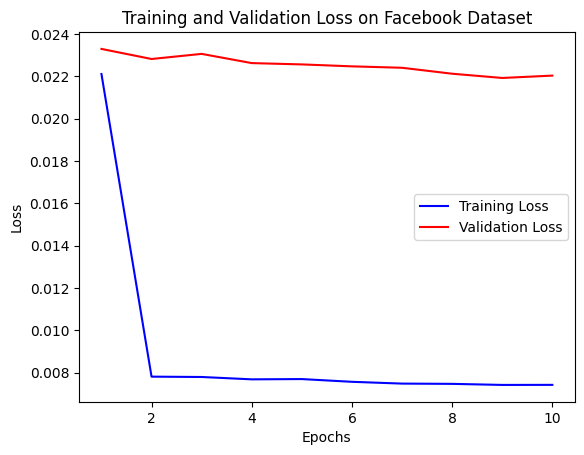

In [ ]:
 # Get training and validation loss from history
train_loss1modif = historyFBmodif.history['loss']
val_loss1modif = historyFBmodif.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss on Facebook Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*   Grafik training loss sangat tinggi di awal, tetapi mengalami penurunan yang dratis saat model diuji. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan
stabil.
*   Grafik validation loss mengalami penurunan walaupun tidak telalu signifikan, tetapi penurunannya stabil. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan
stabil.
*   Hasil akhir dari pengujian model menunjukkan grafik training dan validation loss yang rendah
dan stabil. Grafik menunjukkan penurunan dari keduanya walaupun ada selisih nilai antara training dan testing loss.

##**d. Evaluasi Kedua Arsitektur**

###**Evaluation on IBM Dataset**

In [ ]:
predictions = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print('Baseline Model : ')
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

46/46 [==============================] - 0s 3ms/step
Baseline Model : 
RMSE: 4.788282436286061
MAE: 3.2903902846599307
MAPE: 0.02261431340727339




*   Evaluasi baseline model pertama untuk IBM dataset dilakukan dengan pengujian data testing.
*   RMSE digunakan untuk menghitung rata-rata kesalahan prediksi harga saham (satuan sama
dengan data aslinya / harga saham). MAE untuk mengukur rata-rata kesalahan absolut prediksi. Sedangkan, MAPE mengukur rata-rata persentase kesalahan prediksi (satuan
persen).


*  Dengan nilai RMSE 4.78, berarti model memiliki rata-rata kesalahan prediksi harga saham
sebesar 4.78. Angka ini cukup baik mengingat dataset yang digunakan terdiri dari ribuan
data.
*  Dengan nilai MAE 3.29, berarti model memiliki rata-rata kesalahan absolut harga saham
sebesar 3.29.
*  Dengan nilai MAPE 0.02, berarti model memiliki rata-rata presentase kesalahan prediksi
harga saham sebesar 2,2%.
*  Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang sudah
baik, ketiganya menunjukkan nilai yang mendekati angka 0. Semakin kecil angka RMSE,
MAE, dan MAPE maka semakin kecil kesalahan prediksi yang dilakukan oleh model

46/46 [==============================] - 0s 3ms/step


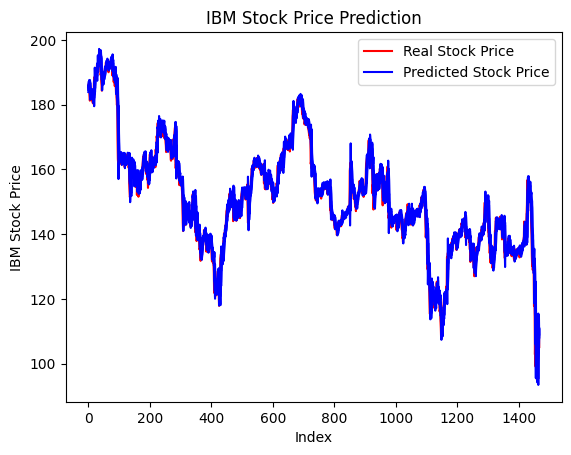

In [ ]:
def preprocess_data(data, target_column, train_end_date, test_start_date, test_set, timesteps):
    df = pd.concat((data[target_column][:train_end_date], data[target_column][test_start_date:]), axis=0)

    # Normalize the input data
    sc = MinMaxScaler(feature_range=(0, 1))
    inputs = data[len(data) - len(test_set) - timesteps:].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.fit_transform(inputs)

    # Prepare the input data for prediction
    X_test = []
    for i in range(timesteps, test_set.shape[0] + timesteps):
        X_test.append(inputs[i - timesteps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_test, sc

def predict_stock_price(model, X_test, sc):
    # Perform prediction
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    return predicted_stock_price

def plot(test, predicted, symbol):
    plt.plot(test, color='red', label=f'Real {symbol} Stock Price')
    plt.plot(predicted, color='blue')

    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Index')
    plt.ylabel(f'{symbol} Stock Price')

    # Create a legend with unique labels
    plt.legend(['Real Stock Price', 'Predicted Stock Price'])

    plt.show()

# Dates on IBM set
test_start_date = "1962-01-02"
target = "Price"
train_end_date = "2020-04-01"
original_stock = stockIBM

X_test, sc = preprocess_data(original_stock, target, train_end_date, test_start_date, test_set, timesteps)
predicted_stock_price = predict_stock_price(model, X_test, sc)
plot(test_set, predicted_stock_price, 'IBM')

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Grafik menunjukkan hasil
yang sangat baik, karena garis antar keduanya sama (berada di titik/garis yang sama). Hanya ada sedikit perbedaan garis di beberapa titik data.

In [ ]:
model_pred = model.predict(x_test)
actual = np.argmax(x_test, axis=1)
model_pred = np.argmax(model_pred, axis=1)

print("Ground Truth:", actual)
print("Predicted Result:",model_pred)

46/46 [==============================] - 0s 3ms/step
Ground Truth: [[4]
 [1]
 [4]
 ...
 [2]
 [4]
 [2]]
Predicted Result: [3 2 2 ... 3 2 4]


Output diatas merepresentasikan nilai asli dengan nilai prediksi menggunakan model.

In [ ]:
predictions1 = modified.predict(x_test)

rmse_modif = np.sqrt(mean_squared_error(y_test, predictions1))
mae_modif = mean_absolute_error(y_test, predictions1)
mape_nodif = mean_absolute_percentage_error(y_test, predictions1)

print('Modified Model : ')
print("RMSE:", rmse_modif)
print("MAE:", mae_modif)
print('MAPE:', mape_nodif)

46/46 [==============================] - 0s 2ms/step
Modified Model : 
RMSE: 4.474909056846214
MAE: 3.1240264515817904
MAPE: 0.02142479581013549


*   Evaluasi model setelah dimodifikasi dan dilakukan uji menggunakan data testing. Evaluasi
dilakukan dengan mengecek kembali nilai RMSE, MAE, dan MAPE.
*   Dengan nilai RMSE 4.47, berarti adanya kenaikan dari nilai RMSE setelah model dimodifikasi.
Nilai ini menunjukkan model memiliki rata-rata kesalahan prediksi harga saham yang semakin
kecil, yaitu 4.47.
* Nilai MAE 3.12, berarti berarti adanya kenaikan dari nilai MAE setelah model dimodifikasi.
Nilai ini menunjukkan model memiliki rata-rata kesalahan absolut harga saham yang semakin
kecil, yaitu 3.12.
*  Dengan nilai MAPE 0.021, berarti berarti adanya kenaikan dari nilai MAPE setelah model
dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata presentase kesalahan prediksi
harga saham yang semakin kecil, yaitu 2,1%.
* Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang semakin kecil,
berarti adanya peningkatan dari ketiga metriks evaluasi. Nilai dari model pertama dengan model yang sudah dimodifikasi menunjukkan adanya penurunan dari jumlah kesalahan
prediksi yang dibuat model.

46/46 [==============================] - 0s 5ms/step


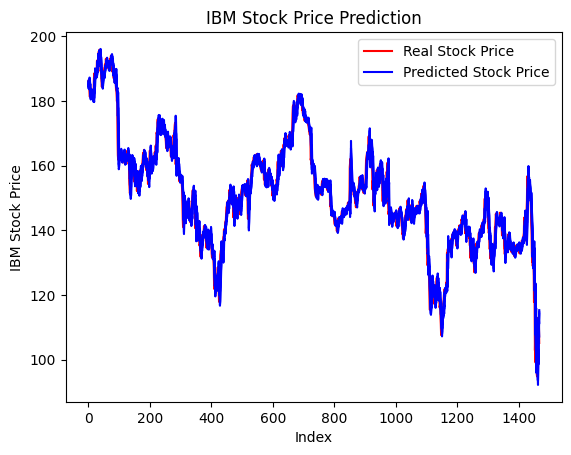

In [ ]:
def preprocess_data(data, target_column, train_end_date, test_start_date, test_set, timesteps):
    df = pd.concat((data[target_column][:train_end_date], data[target_column][test_start_date:]), axis=0)

    # Normalize the input data
    sc = MinMaxScaler(feature_range=(0, 1))
    inputs = df[len(df) - len(test_set) - timesteps:].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.fit_transform(inputs)

    # Prepare the input data for prediction
    X_test = []
    for i in range(timesteps, test_set.shape[0] + timesteps):
        X_test.append(inputs[i - timesteps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_test, sc

def predict_stock_price(model, X_test, sc):
    # Perform prediction
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    return predicted_stock_price

def plot(test, predicted, symbol):
    plt.plot(test, color='red', label=f'Real {symbol} Stock Price')
    plt.plot(predicted, color='blue')

    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Index')
    plt.ylabel(f'{symbol} Stock Price')

    # Create a legend with unique labels
    plt.legend(['Real Stock Price', 'Predicted Stock Price'])

    plt.show()

# Dates on IBM set
test_start_date = "1962-01-02"
target = "Price"
train_end_date = "2020-04-01"
original_stock = stockIBM

X_test, sc = preprocess_data(original_stock, target, train_end_date, test_start_date, test_set, timesteps)
predicted_stock_price = predict_stock_price(modified, X_test, sc)
plot(test_set, predicted_stock_price, 'IBM')

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Grafik menunjukkan hasil
yang sangat baik, karena garis antar keduanya sama (berada di titik/garis yang sama). Hanya ada sedikit perbedaan garis di beberapa titik data.

In [ ]:
model_predmodif = modified.predict(x_test)
actualmodif = np.argmax(x_test, axis=1)
model_pred = np.argmax(model_predmodif, axis=1)

print("Ground Truth:", actualmodif)
print("Predicted Result:",model_pred)

46/46 [==============================] - 0s 2ms/step
Ground Truth: [[4]
 [1]
 [4]
 ...
 [2]
 [4]
 [2]]
Predicted Result: [0 4 0 ... 3 0 1]


Output diatas merepresentasikan nilai asli dengan nilai prediksi menggunakan model.

###**Evaluation on FB Dataset**

In [ ]:
predictionsFB = model2.predict(x_test1)

rmseFB = np.sqrt(mean_squared_error(y_test1, predictionsFB))
maeFB = mean_absolute_error(y_test1, predictionsFB)
mapeFB = mean_absolute_percentage_error(y_test1, predictionsFB)

print('Baseline Model : ')
print("RMSE:", rmseFB)
print("MAE:", maeFB)
print("MAPE:", mapeFB)

6/6 [==============================] - 0s 4ms/step
Baseline Model : 
RMSE: 8.195358943407312
MAE: 5.653048366970486
MAPE: 0.030600596918593348




*   Evaluasi baseline model pertama untuk Facebook dataset dilakukan dengan pengujian data testing.
*   RMSE digunakan untuk menghitung rata-rata kesalahan prediksi harga saham (satuan sama
dengan data aslinya / harga saham). MAE untuk mengukur rata-rata kesalahan absolut prediksi. Sedangkan, MAPE mengukur rata-rata persentase kesalahan prediksi (satuan
persen).


*  Dengan nilai RMSE 8.19, berarti model memiliki rata-rata kesalahan prediksi harga saham
sebesar 8.19. Angka ini cukup baik mengingat dataset yang digunakan terdiri dari ribuan
data.
*  Dengan nilai MAE 5.65 berarti model memiliki rata-rata kesalahan absolut harga saham
sebesar 5.65.
*  Dengan nilai MAPE 0.03, berarti model memiliki rata-rata presentase kesalahan prediksi
harga saham sebesar 3%.
*  Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang sudah cukup
baik, walaupun nilai RMSE tidak mendekati angka 0, tetapi nilai MAE dan MAPE sudah mendekati angka 0. Semakin kecil angka RMSE,
MAE, dan MAPE maka semakin kecil kesalahan prediksi yang dilakukan oleh model

46/46 [==============================] - 0s 3ms/step


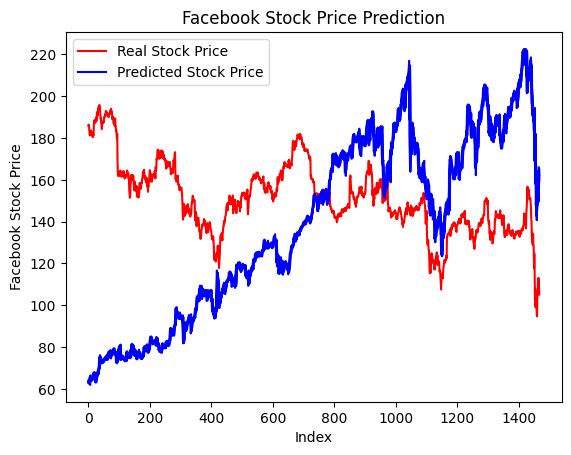

In [ ]:
def preprocess_data(data, target_column, train_end_date, test_start_date, test_set, timesteps):
    df = pd.concat((data[target_column][:train_end_date], data[target_column][test_start_date:]), axis=0)

    # Normalize the input data
    sc = MinMaxScaler(feature_range=(0, 1))
    inputs = data[len(data) - len(test_set) - timesteps:].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.fit_transform(inputs)

    # Prepare the input data for prediction
    X_test = []
    for i in range(timesteps, test_set.shape[0] + timesteps):
        X_test.append(inputs[i - timesteps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_test, sc

def predict_stock_price(model, X_test, sc):
    # Perform prediction
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    return predicted_stock_price

def plot(test, predicted, symbol):
    plt.plot(test, label=f'Real {symbol} Stock Price')
    plt.plot(predicted)

    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Index')
    plt.ylabel(f'{symbol} Stock Price')

    # Create a legend with unique labels
    plt.legend(['Real Stock Price', 'Predicted Stock Price'])

    plt.show()

# Dates on IBM set
test_start_date = "2012-05-18"
target = "Price"
train_end_date = "2020-04-01"
dataset = stockFB

X_test, sc = preprocess_data(dataset, target, train_end_date, test_start_date, test_set, timesteps)
predicted_stock_price = predict_stock_price(model2, X_test, sc)
plot(test_set, predicted_stock_price, 'Facebook')

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Grafik menunjukkan hasil
yang kurang baik, karena garis antar keduanya cukup berbeda (tidak berada di titik/garis yang sama). Hanya ada sedikit garis yang sama di beberapa titik data. Hal ini karena model prediksi untuk FB dataset kurang tepat memprediksi dengan data aslinya.

In [ ]:
modelFB = model2.predict(x_test)
actual2 = np.argmax(x_test, axis=1)
model_pred = np.argmax(modelFB, axis=1)

print("Ground Truth:", actual2)
print("Predicted Result:",model_pred)

46/46 [==============================] - 0s 5ms/step
Ground Truth: [[4]
 [1]
 [4]
 ...
 [2]
 [4]
 [2]]
Predicted Result: [0 2 0 ... 4 4 2]


Output diatas merepresentasikan nilai asli dengan nilai prediksi menggunakan model.

In [ ]:
predictionsFBmodif = modifiedFB.predict(x_test1)

rmseFBmodif = np.sqrt(mean_squared_error(y_test1, predictionsFBmodif))
maeFBmodif = mean_absolute_error(y_test1, predictionsFBmodif)
mapeFBmodif = mean_absolute_percentage_error(y_test1, predictionsFBmodif)

print('Modified Model : ')
print("RMSE:", rmseFBmodif)
print("MAE:", maeFBmodif)
print("MAPE:", mapeFBmodif)

6/6 [==============================] - 0s 5ms/step
Modified Model : 
RMSE: 7.621974268189457
MAE: 5.390158097201554
MAPE: 0.02900951134951244


*   Evaluasi model setelah dimodifikasi dan dilakukan uji menggunakan data testing. Evaluasi
dilakukan dengan mengecek kembali nilai RMSE, MAE, dan MAPE.
*   Dengan nilai RMSE 7.62, berarti adanya kenaikan dari nilai RMSE setelah model dimodifikasi.
Nilai ini menunjukkan model memiliki rata-rata kesalahan prediksi harga saham yang semakin
kecil, yaitu 7.62.
* Nilai MAE 5.39, berarti berarti adanya kenaikan dari nilai MAE setelah model dimodifikasi.
Nilai ini menunjukkan model memiliki rata-rata kesalahan absolut harga saham yang semakin
kecil, yaitu 5.39.
*  Dengan nilai MAPE 0.029, berarti berarti adanya kenaikan dari nilai MAPE setelah model
dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata presentase kesalahan prediksi
harga saham yang semakin kecil, yaitu 2,9%.
* Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang semakin kecil,
berarti adanya peningkatan dari ketiga metriks evaluasi. Nilai dari model pertama dengan model yang sudah dimodifikasi menunjukkan adanya penurunan dari jumlah kesalahan
prediksi yang dibuat model.

46/46 [==============================] - 0s 3ms/step


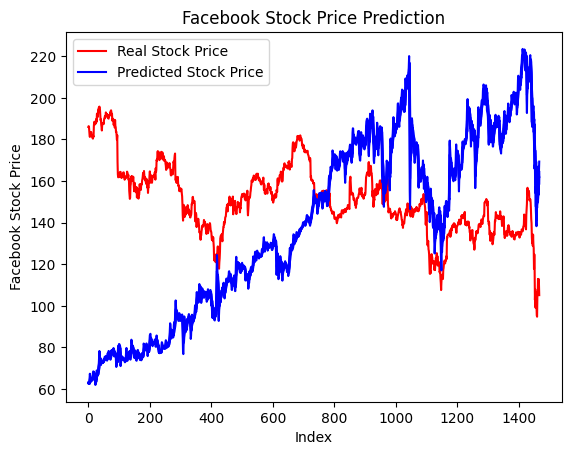

In [ ]:
def preprocess_data(data, target_column, train_end_date, test_start_date, test_set, timesteps):
    df = pd.concat((data[target_column][:train_end_date], data[target_column][test_start_date:]), axis=0)

    # Normalize the input data
    sc = MinMaxScaler(feature_range=(0, 1))
    inputs = df[len(df) - len(test_set) - timesteps:].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.fit_transform(inputs)

    # Prepare the input data for prediction
    X_test = []
    for i in range(timesteps, test_set.shape[0] + timesteps):
        X_test.append(inputs[i - timesteps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_test, sc

def predict_stock_price(model, X_test, sc):
    # Perform prediction
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    return predicted_stock_price

def plot(test, predicted, symbol):
    plt.plot(test, label=f'Real {symbol} Stock Price')
    plt.plot(predicted)

    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Index')
    plt.ylabel(f'{symbol} Stock Price')

    # Create a legend with unique labels
    plt.legend(['Real Stock Price', 'Predicted Stock Price'])

    plt.show()

# Dates on IBM set
test_start_date = "1962-01-02"
target = "Price"
train_end_date = "2020-04-01"
original_stock = stockFB

X_test, sc = preprocess_data(original_stock, target, train_end_date, test_start_date, test_set, timesteps)
predicted_stock_price = predict_stock_price(modifiedFB, X_test, sc)
plot(test_set, predicted_stock_price, 'Facebook')

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Grafik menunjukkan hasil
yang kurang baik, karena garis antar keduanya cukup berbeda (tidak berada di titik/garis yang sama). Namun, ada peningkatan dari grafik sebelumnya setelah dilakukan tuning. Garis yang berdekatan atau berada di garis yang sama meningkat. Ini berarti model mempelajari pola lebih baik untuk membuat data prediksi dengan data aslinya.

In [ ]:
modif_FB = modifiedFB.predict(x_test)
actualFB = np.argmax(x_test, axis=1)
model_pred2 = np.argmax(modif_FB, axis=1)

print("Ground Truth:", actualFB)
print("Predicted Result:", model_pred2)

46/46 [==============================] - 0s 4ms/step
Ground Truth: [[4]
 [1]
 [4]
 ...
 [2]
 [4]
 [2]]
Predicted Result: [3 0 3 ... 4 3 4]


Output diatas merepresentasikan nilai asli dengan nilai prediksi menggunakan model.

##**e. Video Presentasi**

Link Video : https://youtu.be/LUsxBuxWppk